In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
df = pd.read_csv("SouthGermanCredit.asc", sep=" ")

In [3]:
print("The shape of the DataFrame is: {}".format(df.shape))

The shape of the DataFrame is: (1000, 21)


In [4]:
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
df.duplicated().sum()

0

## c) Build a model with training data from female : non-single or male : single (category 2) only but predict on the whole dataset.

### i) Predict data with femage category 2:

In [7]:
input_f2 = df[df['famges'] == 2]
input_f2

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1
12,1,6,4,3,1957,1,4,1,2,1,...,3,31,3,2,1,3,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,...,3,23,3,2,1,2,2,1,2,0
989,2,24,2,0,2718,1,3,3,2,1,...,2,20,3,1,1,2,2,2,2,0
990,1,18,2,6,750,1,1,4,2,1,...,1,27,3,2,1,1,2,1,2,0
991,2,24,2,1,12579,1,5,4,2,1,...,4,44,3,3,1,4,2,2,2,0


Let us take out 30 data from the whole data set for testing the model performance later. Since we only have 310 data instance in total, if we use the whole data set to train the model and later test the model using the same data set, we will likely to see a very good performance of the model. Therefore, we would take out around 10% of the original data set for testing the performance of the model.

Let us find 15 data instances with credit equals 1 and another 15 data instances with credit equals 0:

In [8]:
testing1 = input_f2[input_f2['kredit'] == 1][:15]
testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1
12,1,6,4,3,1957,1,4,1,2,1,...,3,31,3,2,1,3,2,1,2,1
26,1,12,2,2,652,1,5,4,2,1,...,2,24,3,1,1,3,2,1,2,1
33,4,24,2,3,1376,3,4,4,2,1,...,3,28,3,2,1,3,2,1,2,1
35,1,6,4,0,860,1,5,1,2,1,...,4,39,3,2,2,3,2,2,2,1
39,4,24,4,1,3868,1,5,4,2,1,...,3,41,3,1,2,4,2,2,2,1
40,4,12,4,5,996,5,4,4,2,1,...,1,23,3,2,2,3,2,1,2,1


In [9]:
testing0 = input_f2[input_f2['kredit'] == 0][:15]
testing0

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
158,2,48,1,9,6416,1,5,4,2,1,...,4,59,3,1,1,3,2,1,2,0
171,1,12,2,0,1228,1,3,4,2,1,...,1,24,3,2,1,2,2,1,2,0
304,3,9,2,3,745,1,3,3,2,1,...,1,28,3,2,1,2,2,1,2,0
353,1,12,4,0,3499,1,3,3,2,2,...,1,29,3,2,2,3,2,1,2,0
386,2,9,2,2,918,1,3,4,2,1,...,2,30,3,2,1,3,2,1,2,0
427,2,9,4,6,1501,1,5,2,2,1,...,3,34,3,2,2,4,2,2,2,0
518,4,24,2,3,5943,5,2,1,2,1,...,3,44,3,2,2,3,2,2,2,0


Combine the two we get the 30 data we take out for final performance testing:

In [10]:
testing = pd.concat([testing1, testing0])
testing

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1
12,1,6,4,3,1957,1,4,1,2,1,...,3,31,3,2,1,3,2,1,2,1
26,1,12,2,2,652,1,5,4,2,1,...,2,24,3,1,1,3,2,1,2,1
33,4,24,2,3,1376,3,4,4,2,1,...,3,28,3,2,1,3,2,1,2,1
35,1,6,4,0,860,1,5,1,2,1,...,4,39,3,2,2,3,2,2,2,1
39,4,24,4,1,3868,1,5,4,2,1,...,3,41,3,1,2,4,2,2,2,1
40,4,12,4,5,996,5,4,4,2,1,...,1,23,3,2,2,3,2,1,2,1


Now, we will take out the testing data from the input data which we will use to train the data:

In [11]:
input_f2_good = input_f2[input_f2['kredit'] == 1][15:]
input_f2_good

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
68,2,12,2,3,1567,1,3,1,2,1,...,3,22,3,2,1,3,2,2,2,1
80,4,24,4,0,2022,1,3,4,2,1,...,3,37,3,2,1,3,2,2,2,1
87,4,36,3,3,4454,1,3,4,2,1,...,1,34,3,2,2,3,2,1,2,1
88,1,6,4,0,666,4,4,3,2,1,...,1,39,3,2,2,2,2,2,2,1
89,2,24,3,0,1965,5,3,4,2,1,...,3,42,3,1,2,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,4,21,2,0,2782,3,4,1,2,1,...,3,31,1,2,1,4,2,1,2,1
733,1,15,2,0,2511,1,1,1,2,1,...,3,23,3,1,1,3,2,1,2,1
740,4,12,2,2,1736,1,4,3,2,1,...,1,31,3,2,1,2,2,1,2,1
744,4,30,2,1,4811,5,4,2,2,1,...,2,24,2,1,1,2,2,1,2,1


In [12]:
input_f2_bad = input_f2[input_f2['kredit'] == 0][15:]
input_f2_bad

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
578,1,33,4,2,4281,3,3,1,2,1,...,3,23,3,2,2,3,2,1,2,0
579,1,42,2,3,7174,5,4,4,2,1,...,3,30,3,2,1,4,2,2,2,0
583,1,12,2,4,741,2,1,4,2,1,...,2,22,3,2,1,3,2,1,2,0
592,1,36,4,2,6229,1,2,4,2,2,...,4,23,3,1,2,2,2,2,2,0
593,1,24,1,0,1193,1,1,1,2,2,...,4,29,3,1,2,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,...,3,23,3,2,1,2,2,1,2,0
989,2,24,2,0,2718,1,3,3,2,1,...,2,20,3,1,1,2,2,2,2,0
990,1,18,2,6,750,1,1,4,2,1,...,1,27,3,2,1,1,2,1,2,0
991,2,24,2,1,12579,1,5,4,2,1,...,4,44,3,3,1,4,2,2,2,0


Combine the two:

In [13]:
input_f2 = pd.concat([input_f2_good, input_f2_bad])
input_f2

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
68,2,12,2,3,1567,1,3,1,2,1,...,3,22,3,2,1,3,2,2,2,1
80,4,24,4,0,2022,1,3,4,2,1,...,3,37,3,2,1,3,2,2,2,1
87,4,36,3,3,4454,1,3,4,2,1,...,1,34,3,2,2,3,2,1,2,1
88,1,6,4,0,666,4,4,3,2,1,...,1,39,3,2,2,2,2,2,2,1
89,2,24,3,0,1965,5,3,4,2,1,...,3,42,3,1,2,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,...,3,23,3,2,1,2,2,1,2,0
989,2,24,2,0,2718,1,3,3,2,1,...,2,20,3,1,1,2,2,2,2,0
990,1,18,2,6,750,1,1,4,2,1,...,1,27,3,2,1,1,2,1,2,0
991,2,24,2,1,12579,1,5,4,2,1,...,4,44,3,3,1,4,2,2,2,0


Below is the target variable which is the credit: 

In [14]:
target_f2 = input_f2['kredit']

In [15]:
target_f2

68     1
80     1
87     1
88     1
89     1
      ..
988    0
989    0
990    0
991    0
993    0
Name: kredit, Length: 280, dtype: int64

With the credit (target) column taken out, we get the input data for model training:

In [16]:
input_f2 = input_f2.drop(['kredit'], axis='columns')

In [17]:
input_f2

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
68,2,12,2,3,1567,1,3,1,2,1,1,3,22,3,2,1,3,2,2,2
80,4,24,4,0,2022,1,3,4,2,1,4,3,37,3,2,1,3,2,2,2
87,4,36,3,3,4454,1,3,4,2,1,4,1,34,3,2,2,3,2,1,2
88,1,6,4,0,666,4,4,3,2,1,4,1,39,3,2,2,2,2,2,2
89,2,24,3,0,1965,5,3,4,2,1,4,3,42,3,1,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,2,3,23,3,2,1,2,2,1,2
989,2,24,2,0,2718,1,3,3,2,1,4,2,20,3,1,1,2,2,2,2
990,1,18,2,6,750,1,1,4,2,1,1,1,27,3,2,1,1,2,1,2
991,2,24,2,1,12579,1,5,4,2,1,2,4,44,3,3,1,4,2,2,2


In [18]:
kfold = StratifiedKFold(n_splits=10)
m_rfc_f2 = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

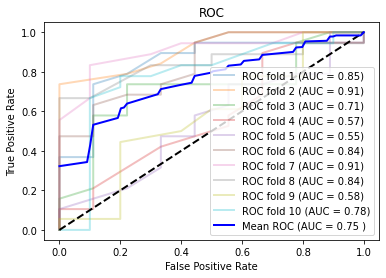

In [19]:
x = input_f2
y = target_f2
for train,test in kfold.split(x,y):
    model = m_rfc_f2.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

From above we can see the model's performance with only training and testing data set is okay. Now let us test the model's performance using the 30 testing data we have saved from the whole data set: (This is also the performance of predicting data with famges category 2)

In [20]:
y_true = testing['kredit']
y_true

0      1
2      1
8      1
9      1
12     1
26     1
33     1
35     1
39     1
40     1
41     1
42     1
55     1
61     1
65     1
45     0
47     0
110    0
158    0
171    0
304    0
353    0
386    0
427    0
518    0
519    0
520    0
521    0
540    0
562    0
Name: kredit, dtype: int64

In [21]:
x_testing = testing.drop(['kredit'], axis='columns')

In [22]:
format(x_testing.shape)

'(30, 20)'

In [23]:
y_pred = m_rfc_f2.predict(x_testing)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [24]:
metrics.accuracy_score(y_true, y_pred, normalize = True)

0.6

In [25]:
metrics.precision_score(y_true, y_pred)

0.5714285714285714

In [26]:
metrics.f1_score(y_true, y_pred)

0.6666666666666666

In [27]:
metrics.roc_auc_score(y_true, y_pred)

0.6000000000000001

The performance for predicting the 30 testing data not as good as the previous results, but this could be becuase that there are too few testing data.

### ii) Predict data with femage category 1:

Now we have the model build from solely the data from famges category 2, let us seperate out data from famges category 1 and see the performance of the model:

In [28]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [29]:
x_testing1 = df[df['famges'] == 1]
x_testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
50,4,12,2,0,640,1,3,4,1,1,...,1,49,3,2,1,2,2,1,2,1
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
112,2,12,4,0,2366,3,4,3,1,1,...,3,36,3,2,1,4,2,2,2,1
135,4,6,2,2,1543,4,3,4,1,1,...,1,33,3,2,1,3,2,1,2,1
147,1,12,2,2,1262,5,5,2,1,1,...,2,49,3,2,1,2,2,2,2,1
154,2,12,2,3,1158,3,3,3,1,1,...,3,26,3,2,1,3,2,2,2,1
161,3,24,4,9,1275,4,3,2,1,1,...,1,36,3,2,2,3,2,2,2,1
175,4,24,2,3,3235,3,5,3,1,1,...,3,36,3,2,1,4,2,2,2,1
233,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,2,2,2,1
279,3,9,2,3,1126,2,5,2,1,1,...,1,49,3,2,1,3,2,1,2,1


In [30]:
y_true1 = x_testing1['kredit']
y_true1

50     1
97     0
112    1
135    1
147    1
154    1
161    1
175    1
233    1
279    1
283    1
293    1
322    1
352    1
369    1
460    1
486    1
503    1
512    1
560    1
581    0
594    1
605    1
611    1
618    0
620    1
641    1
645    1
675    1
686    1
735    1
741    1
749    1
759    0
776    0
777    0
784    0
792    0
797    0
822    0
837    0
852    0
857    0
860    0
873    0
932    0
933    0
956    0
975    0
986    0
Name: kredit, dtype: int64

In [31]:
x_testing1 = x_testing1.drop(['kredit'], axis='columns')
x_testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
50,4,12,2,0,640,1,3,4,1,1,2,1,49,3,2,1,2,2,1,2
97,2,36,3,9,4455,1,3,2,1,1,2,1,30,2,2,2,4,2,2,2
112,2,12,4,0,2366,3,4,3,1,1,3,3,36,3,2,1,4,2,2,2
135,4,6,2,2,1543,4,3,4,1,1,2,1,33,3,2,1,3,2,1,2
147,1,12,2,2,1262,5,5,2,1,1,4,2,49,3,2,1,2,2,2,2
154,2,12,2,3,1158,3,3,3,1,1,1,3,26,3,2,1,3,2,2,2
161,3,24,4,9,1275,4,3,2,1,1,4,1,36,3,2,2,3,2,2,2
175,4,24,2,3,3235,3,5,3,1,1,2,3,36,3,2,1,4,2,2,2
233,1,30,2,1,3857,1,3,4,1,1,4,2,40,3,2,1,4,2,2,2
279,3,9,2,3,1126,2,5,2,1,1,4,1,49,3,2,1,3,2,1,2


In [32]:
y_pred1 = m_rfc_f2.predict(x_testing1)
y_pred1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
metrics.accuracy_score(y_true1, y_pred1, normalize = True)

0.7

In [34]:
metrics.precision_score(y_true1, y_pred1)

0.6829268292682927

In [35]:
metrics.f1_score(y_true1, y_pred1)

0.7887323943661972

In [36]:
metrics.roc_auc_score(y_true1, y_pred1)

0.6416666666666666

As we can see from the above scores, the performance of model trained with data in sex category 2 perfomed not so well.

### ii) Predict data with femage category 3:

Now we have the model build from solely the data from famges category 2, let us seperate out data from famges category 3 and see the performance of the model:

In [37]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [38]:
x_testing3 = df[df['famges'] == 3]
x_testing3

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [39]:
y_true3 = x_testing3['kredit']
y_true3

1      1
3      1
4      1
5      1
6      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: kredit, Length: 548, dtype: int64

In [40]:
x_testing3 = x_testing3.drop(['kredit'], axis='columns')
x_testing3

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2


In [41]:
y_pred3 = m_rfc_f2.predict(x_testing3)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
metrics.accuracy_score(y_true3, y_pred3, normalize = True)

0.7791970802919708

In [43]:
metrics.precision_score(y_true3, y_pred3)

0.8215102974828375

In [44]:
metrics.f1_score(y_true3, y_pred3)

0.8557806912991657

In [45]:
metrics.roc_auc_score(y_true3, y_pred3)

0.6793941252640905

The performance of predicting data with sex category 3 is better than predicting the data with sex category 1.

### ii) Predict data with femage category 4:

Now we have the model build from solely the data from famges category 4, let us seperate out data from famges category 4 and see the performance of the model:

In [46]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [47]:
x_testing4 = df[df['famges'] == 4]
x_testing4

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
11,1,30,4,1,6187,2,4,1,4,1,...,3,24,3,1,2,3,2,1,2,1
14,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
17,2,18,2,3,3213,3,2,1,4,1,...,1,25,3,1,1,3,2,1,2,1
48,4,24,2,0,1474,2,2,4,4,1,...,1,33,3,2,1,3,2,2,2,1
57,1,15,2,3,1053,1,2,4,4,1,...,1,27,3,2,1,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,18,2,3,1345,1,3,4,4,1,...,1,26,3,2,1,3,2,1,2,0
980,2,24,2,3,2039,1,2,1,4,1,...,2,22,3,2,1,3,2,2,2,0
981,4,18,3,9,2169,1,3,4,4,1,...,3,28,3,2,1,3,2,2,2,0
984,1,48,2,3,6999,1,4,1,4,3,...,1,34,3,2,2,3,2,2,2,0


In [48]:
y_true4 = x_testing4['kredit']
y_true4

11     1
14     1
17     1
48     1
57     1
      ..
967    0
980    0
981    0
984    0
987    0
Name: kredit, Length: 92, dtype: int64

In [49]:
x_testing4 = x_testing4.drop(['kredit'], axis='columns')
x_testing4

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
11,1,30,4,1,6187,2,4,1,4,1,4,3,24,3,1,2,3,2,1,2
14,1,18,2,3,1936,5,4,2,4,1,4,3,23,3,1,2,2,2,1,2
17,2,18,2,3,3213,3,2,1,4,1,3,1,25,3,1,1,3,2,1,2
48,4,24,2,0,1474,2,2,4,4,1,3,1,33,3,2,1,3,2,2,2
57,1,15,2,3,1053,1,2,4,4,1,2,1,27,3,2,1,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,18,2,3,1345,1,3,4,4,1,3,1,26,3,2,1,3,2,1,2
980,2,24,2,3,2039,1,2,1,4,1,1,2,22,3,2,1,3,2,2,2
981,4,18,3,9,2169,1,3,4,4,1,2,3,28,3,2,1,3,2,2,2
984,1,48,2,3,6999,1,4,1,4,3,1,1,34,3,2,2,3,2,2,2


In [50]:
y_pred4 = m_rfc_f2.predict(x_testing4)
y_pred4

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1], dtype=int64)

In [51]:
metrics.accuracy_score(y_true4, y_pred4, normalize = True)

0.7391304347826086

In [52]:
metrics.precision_score(y_true4, y_pred4)

0.7866666666666666

In [53]:
metrics.f1_score(y_true4, y_pred4)

0.8309859154929576

In [54]:
metrics.roc_auc_score(y_true4, y_pred4)

0.6202985074626866

The performance of the model predicting data with sex category 4 is not bad. We can see from the above models, if the initial data we obtained has bias (only have data coming from a single sex category), the model would not learn well in order to predict data from other sex categories.

## d) Build a model with training data from female : single (category 4) only but predict on the whole dataset.

### i) Predict data with femage category 4 itself:

In [55]:
input_f4 = df[df['famges'] == 4]
input_f4

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
11,1,30,4,1,6187,2,4,1,4,1,...,3,24,3,1,2,3,2,1,2,1
14,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
17,2,18,2,3,3213,3,2,1,4,1,...,1,25,3,1,1,3,2,1,2,1
48,4,24,2,0,1474,2,2,4,4,1,...,1,33,3,2,1,3,2,2,2,1
57,1,15,2,3,1053,1,2,4,4,1,...,1,27,3,2,1,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,18,2,3,1345,1,3,4,4,1,...,1,26,3,2,1,3,2,1,2,0
980,2,24,2,3,2039,1,2,1,4,1,...,2,22,3,2,1,3,2,2,2,0
981,4,18,3,9,2169,1,3,4,4,1,...,3,28,3,2,1,3,2,2,2,0
984,1,48,2,3,6999,1,4,1,4,3,...,1,34,3,2,2,3,2,2,2,0


Let us take out 10 data instance for testing the model. When we use model trained only with data instance from famges category 4 and predict data from other femage categories, the testing data are all new to the model, which means the performance scores of the model will be relatively more realistic. Therefore, we also save some data from category 4 for latering performance testing, which makes the performace scores more comparable to the other three.

Let us find 5 data instances with credit equals 1 and another 5 data instances with credit equals 0:

In [56]:
testing1 = input_f4[input_f4['kredit'] == 1][:5]
testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
11,1,30,4,1,6187,2,4,1,4,1,...,3,24,3,1,2,3,2,1,2,1
14,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
17,2,18,2,3,3213,3,2,1,4,1,...,1,25,3,1,1,3,2,1,2,1
48,4,24,2,0,1474,2,2,4,4,1,...,1,33,3,2,1,3,2,2,2,1
57,1,15,2,3,1053,1,2,4,4,1,...,1,27,3,2,1,3,2,1,1,1


In [57]:
testing0 = input_f4[input_f4['kredit'] == 0][:5]
testing0

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
234,2,12,2,0,685,1,4,2,4,1,...,3,25,1,2,1,2,2,1,2,0
719,2,72,2,3,5595,2,3,2,4,1,...,3,24,3,2,1,3,2,1,2,0
742,1,24,2,2,2996,5,3,2,4,1,...,3,20,3,2,1,3,2,1,2,0
772,1,18,2,4,1217,1,3,4,4,1,...,1,47,3,2,1,2,2,2,2,0
778,2,18,4,3,1245,1,3,4,4,1,...,3,33,3,2,1,3,2,1,2,0


Combine the two we get the 10 data we take out for final performance testing:

In [58]:
testing = pd.concat([testing1, testing0])
testing

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
11,1,30,4,1,6187,2,4,1,4,1,...,3,24,3,1,2,3,2,1,2,1
14,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
17,2,18,2,3,3213,3,2,1,4,1,...,1,25,3,1,1,3,2,1,2,1
48,4,24,2,0,1474,2,2,4,4,1,...,1,33,3,2,1,3,2,2,2,1
57,1,15,2,3,1053,1,2,4,4,1,...,1,27,3,2,1,3,2,1,1,1
234,2,12,2,0,685,1,4,2,4,1,...,3,25,1,2,1,2,2,1,2,0
719,2,72,2,3,5595,2,3,2,4,1,...,3,24,3,2,1,3,2,1,2,0
742,1,24,2,2,2996,5,3,2,4,1,...,3,20,3,2,1,3,2,1,2,0
772,1,18,2,4,1217,1,3,4,4,1,...,1,47,3,2,1,2,2,2,2,0
778,2,18,4,3,1245,1,3,4,4,1,...,3,33,3,2,1,3,2,1,2,0


Now, we will take out the testing data from the input data which we will use to train the model:

In [59]:
input_f4_good = input_f4[input_f4['kredit'] == 1][5:]
input_f4_good

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
78,1,21,4,0,1602,1,5,4,4,1,...,3,30,3,2,2,3,2,2,2,1
104,4,24,4,3,1851,1,4,4,4,3,...,3,33,3,2,2,3,2,2,2,1
107,4,18,2,3,1473,1,2,3,4,1,...,1,39,3,2,1,3,2,2,2,1
122,2,6,2,3,2063,1,2,4,4,1,...,3,30,3,1,1,4,2,2,2,1
125,4,24,4,3,5103,1,2,3,4,1,...,4,47,3,3,3,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2,6,2,5,454,1,2,3,4,1,...,2,22,3,2,1,2,2,1,2,1
697,4,24,2,3,1413,1,3,4,4,1,...,2,28,3,2,1,3,2,1,2,1
725,2,18,2,1,2779,1,3,1,4,1,...,3,21,3,1,1,3,2,2,2,1
739,2,20,0,1,6148,2,5,3,4,1,...,3,31,1,2,2,3,2,2,2,1


In [60]:
input_f4_bad = input_f4[input_f4['kredit'] == 0][5:]
input_f4_bad

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
781,1,24,3,3,1024,1,2,4,4,1,...,1,48,2,2,1,3,2,1,2,0
787,2,15,3,5,1512,4,3,3,4,1,...,2,61,2,2,2,3,2,1,2,0
804,1,12,2,0,900,5,3,4,4,1,...,3,23,3,2,1,3,2,1,2,0
854,4,18,2,2,1533,1,2,4,4,2,...,2,43,3,2,1,2,1,1,2,0
859,1,12,2,3,727,2,2,4,4,1,...,4,33,3,2,1,2,2,2,2,0
862,2,12,2,3,1534,1,2,1,4,1,...,1,23,3,1,1,3,2,1,2,0
867,2,36,2,1,9398,1,2,1,4,1,...,3,28,3,1,1,4,2,2,2,0
875,2,30,4,0,4249,1,1,4,4,1,...,3,28,3,2,2,4,2,1,2,0
876,2,30,4,0,5234,1,1,4,4,1,...,3,28,3,2,2,4,2,1,2,0
883,2,15,1,0,1264,2,3,2,4,1,...,2,25,3,1,1,3,2,1,2,0


Combine the two:

In [61]:
input_f4 = pd.concat([input_f4_good, input_f4_bad])
input_f4

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
78,1,21,4,0,1602,1,5,4,4,1,...,3,30,3,2,2,3,2,2,2,1
104,4,24,4,3,1851,1,4,4,4,3,...,3,33,3,2,2,3,2,2,2,1
107,4,18,2,3,1473,1,2,3,4,1,...,1,39,3,2,1,3,2,2,2,1
122,2,6,2,3,2063,1,2,4,4,1,...,3,30,3,1,1,4,2,2,2,1
125,4,24,4,3,5103,1,2,3,4,1,...,4,47,3,3,3,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,18,2,3,1345,1,3,4,4,1,...,1,26,3,2,1,3,2,1,2,0
980,2,24,2,3,2039,1,2,1,4,1,...,2,22,3,2,1,3,2,2,2,0
981,4,18,3,9,2169,1,3,4,4,1,...,3,28,3,2,1,3,2,2,2,0
984,1,48,2,3,6999,1,4,1,4,3,...,1,34,3,2,2,3,2,2,2,0


Below is the target variable which is the credit: 

In [62]:
target_f4 = input_f4['kredit']
target_f4

78     1
104    1
107    1
122    1
125    1
      ..
967    0
980    0
981    0
984    0
987    0
Name: kredit, Length: 82, dtype: int64

With the credit (target) column taken out, we get the input data for model training:

In [63]:
input_f4 = input_f4.drop(['kredit'], axis='columns')

In [64]:
input_f4

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
78,1,21,4,0,1602,1,5,4,4,1,3,3,30,3,2,2,3,2,2,2
104,4,24,4,3,1851,1,4,4,4,3,2,3,33,3,2,2,3,2,2,2
107,4,18,2,3,1473,1,2,3,4,1,4,1,39,3,2,1,3,2,2,2
122,2,6,2,3,2063,1,2,4,4,1,3,3,30,3,1,1,4,2,2,2
125,4,24,4,3,5103,1,2,3,4,1,3,4,47,3,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,18,2,3,1345,1,3,4,4,1,3,1,26,3,2,1,3,2,1,2
980,2,24,2,3,2039,1,2,1,4,1,1,2,22,3,2,1,3,2,2,2
981,4,18,3,9,2169,1,3,4,4,1,2,3,28,3,2,1,3,2,2,2
984,1,48,2,3,6999,1,4,1,4,3,1,1,34,3,2,2,3,2,2,2


In [65]:
kfold = StratifiedKFold(n_splits=10)
m_rfc_f4 = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

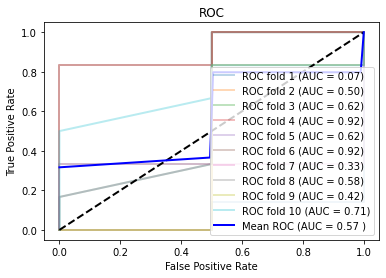

In [66]:
x = input_f4
y = target_f4
for train,test in kfold.split(x,y):
    model = m_rfc_f4.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [67]:
print(recalls)
print(np.mean(recalls))

[0.8571428571428571, 0.8571428571428571, 1.0, 0.8333333333333334, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]
0.8880952380952382


In [68]:
print(precisions)
print(np.mean(precisions))

[0.75, 0.8571428571428571, 0.75, 0.8333333333333334, 0.8571428571428571, 0.75, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8333333333333334]
0.7773809523809524


In [69]:
print(f1scores)
print(np.mean(f1scores))

[0.7999999999999999, 0.8571428571428571, 0.8571428571428571, 0.8333333333333334, 0.923076923076923, 0.8571428571428571, 0.7692307692307692, 0.7692307692307692, 0.7692307692307692, 0.8333333333333334]
0.8268864468864467


In [70]:
print(aucs)
print(np.mean(aucs))

[0.07142857142857142, 0.5, 0.625, 0.9166666666666667, 0.625, 0.9166666666666667, 0.3333333333333333, 0.5833333333333334, 0.4166666666666667, 0.7083333333333333]
0.5696428571428571


The model's performance looks okay with only the training and testing data. Now let us test the model's performance using the 10 testing data we have saved from the whole data set: (This is also the performance of predicting data with famges category 4)

In [71]:
y_true = testing['kredit']
y_true

11     1
14     1
17     1
48     1
57     1
234    0
719    0
742    0
772    0
778    0
Name: kredit, dtype: int64

In [72]:
x_testing = testing.drop(['kredit'], axis='columns') 
x_testing

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
11,1,30,4,1,6187,2,4,1,4,1,4,3,24,3,1,2,3,2,1,2
14,1,18,2,3,1936,5,4,2,4,1,4,3,23,3,1,2,2,2,1,2
17,2,18,2,3,3213,3,2,1,4,1,3,1,25,3,1,1,3,2,1,2
48,4,24,2,0,1474,2,2,4,4,1,3,1,33,3,2,1,3,2,2,2
57,1,15,2,3,1053,1,2,4,4,1,2,1,27,3,2,1,3,2,1,1
234,2,12,2,0,685,1,4,2,4,1,3,3,25,1,2,1,2,2,1,2
719,2,72,2,3,5595,2,3,2,4,1,2,3,24,3,2,1,3,2,1,2
742,1,24,2,2,2996,5,3,2,4,1,4,3,20,3,2,1,3,2,1,2
772,1,18,2,4,1217,1,3,4,4,1,3,1,47,3,2,1,2,2,2,2
778,2,18,4,3,1245,1,3,4,4,1,2,3,33,3,2,1,3,2,1,2


In [73]:
y_pred = m_rfc_f4.predict(x_testing)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
metrics.accuracy_score(y_true, y_pred, normalize = True)

0.4

In [75]:
metrics.precision_score(y_true, y_pred)

0.4444444444444444

In [76]:
metrics.f1_score(y_true, y_pred)

0.5714285714285714

In [77]:
metrics.roc_auc_score(y_true, y_pred)

0.4

The performance on the completely new testing data is worse than the performance reported on the model. This is expected since the testing is new to the model. However, the very bad performance may be due to the very small testing data set (only 10).

### ii) Predict data with femage category 1:

Now we have the model build from solely the data from famges category 4, let us seperate out data from famges category 1 and see the performance of the model:

In [78]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [79]:
x_testing1 = df[df['famges'] == 1]
x_testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
50,4,12,2,0,640,1,3,4,1,1,...,1,49,3,2,1,2,2,1,2,1
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
112,2,12,4,0,2366,3,4,3,1,1,...,3,36,3,2,1,4,2,2,2,1
135,4,6,2,2,1543,4,3,4,1,1,...,1,33,3,2,1,3,2,1,2,1
147,1,12,2,2,1262,5,5,2,1,1,...,2,49,3,2,1,2,2,2,2,1
154,2,12,2,3,1158,3,3,3,1,1,...,3,26,3,2,1,3,2,2,2,1
161,3,24,4,9,1275,4,3,2,1,1,...,1,36,3,2,2,3,2,2,2,1
175,4,24,2,3,3235,3,5,3,1,1,...,3,36,3,2,1,4,2,2,2,1
233,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,2,2,2,1
279,3,9,2,3,1126,2,5,2,1,1,...,1,49,3,2,1,3,2,1,2,1


In [80]:
y_true1 = x_testing1['kredit']
y_true1

50     1
97     0
112    1
135    1
147    1
154    1
161    1
175    1
233    1
279    1
283    1
293    1
322    1
352    1
369    1
460    1
486    1
503    1
512    1
560    1
581    0
594    1
605    1
611    1
618    0
620    1
641    1
645    1
675    1
686    1
735    1
741    1
749    1
759    0
776    0
777    0
784    0
792    0
797    0
822    0
837    0
852    0
857    0
860    0
873    0
932    0
933    0
956    0
975    0
986    0
Name: kredit, dtype: int64

In [81]:
x_testing1 = x_testing1.drop(['kredit'], axis='columns')
x_testing1

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
50,4,12,2,0,640,1,3,4,1,1,2,1,49,3,2,1,2,2,1,2
97,2,36,3,9,4455,1,3,2,1,1,2,1,30,2,2,2,4,2,2,2
112,2,12,4,0,2366,3,4,3,1,1,3,3,36,3,2,1,4,2,2,2
135,4,6,2,2,1543,4,3,4,1,1,2,1,33,3,2,1,3,2,1,2
147,1,12,2,2,1262,5,5,2,1,1,4,2,49,3,2,1,2,2,2,2
154,2,12,2,3,1158,3,3,3,1,1,1,3,26,3,2,1,3,2,2,2
161,3,24,4,9,1275,4,3,2,1,1,4,1,36,3,2,2,3,2,2,2
175,4,24,2,3,3235,3,5,3,1,1,2,3,36,3,2,1,4,2,2,2
233,1,30,2,1,3857,1,3,4,1,1,4,2,40,3,2,1,4,2,2,2
279,3,9,2,3,1126,2,5,2,1,1,4,1,49,3,2,1,3,2,1,2


In [82]:
y_pred1 = m_rfc_f4.predict(x_testing1)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [83]:
metrics.accuracy_score(y_true1, y_pred1, normalize = True)

0.64

In [84]:
metrics.precision_score(y_true1, y_pred1)

0.6363636363636364

In [85]:
metrics.f1_score(y_true1, y_pred1)

0.7567567567567568

In [86]:
metrics.roc_auc_score(y_true1, y_pred1)

0.5666666666666667

### iii) Predict data with femage category 2:

Now we have the model build from solely the data from famges category 4, let us seperate out data from famges category 2 and see the performance of the model:

In [87]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [88]:
x_testing2 = df[df['famges'] == 2]
x_testing2

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1
12,1,6,4,3,1957,1,4,1,2,1,...,3,31,3,2,1,3,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,...,3,23,3,2,1,2,2,1,2,0
989,2,24,2,0,2718,1,3,3,2,1,...,2,20,3,1,1,2,2,2,2,0
990,1,18,2,6,750,1,1,4,2,1,...,1,27,3,2,1,1,2,1,2,0
991,2,24,2,1,12579,1,5,4,2,1,...,4,44,3,3,1,4,2,2,2,0


In [89]:
y_true2 = x_testing2['kredit']
y_true2

0      1
2      1
8      1
9      1
12     1
      ..
988    0
989    0
990    0
991    0
993    0
Name: kredit, Length: 310, dtype: int64

In [90]:
x_testing2 = x_testing2.drop(['kredit'], axis='columns')
x_testing2

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
8,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,2,1,2
9,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,2,1,2
12,1,6,4,3,1957,1,4,1,2,1,4,3,31,3,2,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1,18,2,0,976,1,2,1,2,1,2,3,23,3,2,1,2,2,1,2
989,2,24,2,0,2718,1,3,3,2,1,4,2,20,3,1,1,2,2,2,2
990,1,18,2,6,750,1,1,4,2,1,1,1,27,3,2,1,1,2,1,2
991,2,24,2,1,12579,1,5,4,2,1,2,4,44,3,3,1,4,2,2,2


In [91]:
y_pred2 = m_rfc_f4.predict(x_testing2)
y_pred2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [92]:
metrics.accuracy_score(y_true2, y_pred2, normalize = True)

0.6580645161290323

In [93]:
metrics.precision_score(y_true2, y_pred2)

0.6833976833976834

In [94]:
metrics.f1_score(y_true2, y_pred2)

0.7695652173913043

In [95]:
metrics.roc_auc_score(y_true2, y_pred2)

0.5641517184718609

### iiii) Predict data with femage category 3:
Now we have the model build from solely the data from famges category 2, let us seperate out data from famges category 3 and see the performance of the model:

In [96]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [97]:
x_testing3 = df[df['famges'] == 3]
x_testing3

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [98]:
y_true3 = x_testing3['kredit']
y_true3

1      1
3      1
4      1
5      1
6      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: kredit, Length: 548, dtype: int64

In [99]:
x_testing3 = x_testing3.drop(['kredit'], axis='columns')
x_testing3

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2


In [100]:
y_pred3 = m_rfc_f4.predict(x_testing3)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
metrics.accuracy_score(y_true3, y_pred3, normalize = True)

0.7335766423357665

In [102]:
metrics.precision_score(y_true3, y_pred3)

0.756

In [103]:
metrics.f1_score(y_true3, y_pred3)

0.8381374722838137

In [104]:
metrics.roc_auc_score(y_true3, y_pred3)

0.5523410345532611

We can see from the above models, if the initial data we obtained has bias (only have data coming from a single sex category), the model would not learn well in order to predict data from other sex categories.